# 1. Import các thư viện cần thiết

In [4]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    silhouette_score, f1_score, accuracy_score,
    precision_score, recall_score, confusion_matrix,
    classification_report
)
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    ExtraTreesClassifier, AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


# 2. Tổng quan về dữ liệu

In [3]:
data = pd.read_csv('CVD_cleaned.csv')
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

| STT   | Column                        | Description                                                                                  | Data Type |
|-----|-------------------------------|----------------------------------------------------------------------------------------------|-----------|
| 0   | General_Health                | Mức độ sức khỏe tổng quát, biểu diễn dưới dạng chuỗi. Có thể là các giá trị như "Very Good", "Fair", "Poor". | object    |
| 1   | Checkup                       | Tần suất kiểm tra sức khỏe, biểu diễn dưới dạng chuỗi. Có thể là các giá trị như "Within the past year", "Within the past 2 years". | object    |
| 2   | Exercise                      | Thói quen tập thể dục, biểu diễn dưới dạng chuỗi. Có thể là các giá trị như "Yes", "No".     | object    |
| 3   | Heart_Disease                 | Tình trạng bệnh tim, biểu diễn dưới dạng chuỗi. Có thể là các giá trị như "Yes", "No".       | object    |
| 4   | Skin_Cancer                   | Tình trạng ung thư da, biểu diễn dưới dạng chuỗi. Có thể là các giá trị như "Yes", "No".     | object    |
| 5   | Other_Cancer                  | Tình trạng ung thư khác, biểu diễn dưới dạng chuỗi. Có thể là các giá trị như "Yes", "No".   | object    |
| 6   | Depression                    | Tình trạng trầm cảm, biểu diễn dưới dạng chuỗi. Có thể là các giá trị như "Yes", "No".       | object    |
| 7   | Diabetes                      | Tình trạng bệnh tiểu đường, biểu diễn dưới dạng chuỗi. Có thể là các giá trị như "Yes", "No". | object    |
| 8   | Arthritis                     | Tình trạng viêm khớp, biểu diễn dưới dạng chuỗi. Có thể là các giá trị như "Yes", "No".      | object    |
| 9   | Sex                           | Giới tính, biểu diễn dưới dạng chuỗi. Có thể là các giá trị như "Male", "Female".            | object    |
| 10  | Age_Category                  | Nhóm tuổi, biểu diễn dưới dạng chuỗi. Có thể là các giá trị như "18-24", "25-34", "35-44".   | object    |
| 11  | Height_(cm)                   | Chiều cao, biểu diễn dưới dạng số thực.                                                      | float64   |
| 12  | Weight_(kg)                   | Cân nặng, biểu diễn dưới dạng số thực.                                                       | float64   |
| 13  | BMI                           | Chỉ số khối cơ thể (Body Mass Index), biểu diễn dưới dạng số thực.                           | float64   |
| 14  | Smoking_History               | Lịch sử hút thuốc . | object    |
| 15  | Alcohol_Consumption           | Lượng tiêu thụ rượu, biểu diễn dưới dạng số thực. Có thể là lượng rượu tiêu thụ trung bình hàng tuần hoặc hàng tháng. | float64   |
| 16  | Fruit_Consumption             | Lượng tiêu thụ trái cây, biểu diễn dưới dạng số thực. Có thể là số lần ăn trái cây trung bình hàng tuần. | float64   |
| 17  | Green_Vegetables_Consumption  | Lượng tiêu thụ rau xanh, biểu diễn dưới dạng số thực. Có thể là số lần ăn rau xanh trung bình hàng tuần. | float64   |
| 18  | FriedPotato_Consumption       | Lượng tiêu thụ khoai tây chiên, biểu diễn dưới dạng số thực. Có thể là số lần ăn khoai tây chiên trung bình hàng tuần. | float64   |


In [5]:
pd.DataFrame(data.describe()).style.background_gradient(cmap='BuGn')

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


# 3. Tiền xử lí dữ liệu

In [6]:
cols = ['General_Health','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Age_Category','Smoking_History']

In [7]:
for i in cols:
    print(data[i].value_counts())
    print()

General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: count, dtype: int64

Exercise
Yes    239381
No      69473
Name: count, dtype: int64

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64

Skin_Cancer
No     278860
Yes     29994
Name: count, dtype: int64

Other_Cancer
No     278976
Yes     29878
Name: count, dtype: int64

Depression
No     246953
Yes     61901
Name: count, dtype: int64

Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: count, dtype: int64

Arthritis
No     207783
Yes    101071
Name: count, dtype: int64

Sex
Female    160196
Male      148658
Name: count, dtype: int64

Age_Category
65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    2070

## 3.1. Encoding các cột dữ liệu

In [8]:
cols_tmp = ['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Arthritis','Smoking_History']

In [9]:
data[cols_tmp] = data[cols_tmp].replace({
    'Yes':1,
    'No':0
})

data[cols_tmp]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19036\2329682666.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[cols_tmp] = data[cols_tmp].replace({


,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Smoking_History
0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
308849,1,0,0,0,0,0,0
308850,1,0,0,0,0,0,0
308851,1,0,0,0,1,0,1
308852,1,0,0,0,0,0,0


In [10]:
data['General_Health'].value_counts()

General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: count, dtype: int64

In [11]:
data['General_Health'] = data['General_Health'].replace({
    'Very Good':5,
    'Good':4,
    'Excellent':3,
    'Fair':2,
    'Poor':1
})
data['General_Health'].value_counts()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19036\2920130893.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['General_Health'] = data['General_Health'].replace({


General_Health
5    110395
4     95364
3     55954
2     35810
1     11331
Name: count, dtype: int64

In [12]:
data['Sex'] = data['Sex'].replace({
    'Male':0,
    'Female':1
})
data['Sex'].value_counts()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19036\3675635856.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({


Sex
1    160196
0    148658
Name: count, dtype: int64

In [13]:
data['Checkup'].value_counts()

Checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64

In [14]:
data['Checkup'] = data['Checkup'].replace({
    'Never':0,
    'Within the past year':1,
    'Within the past 2 years':2,
    'Within the past 5 years':3,
    '5 or more years ago':4
})

data['Checkup'].value_counts()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19036\544651363.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Checkup'] = data['Checkup'].replace({


Checkup
1    239371
2     37213
3     17442
4     13421
0      1407
Name: count, dtype: int64

In [15]:
data['Age_Category'].value_counts()

Age_Category
65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: count, dtype: int64

In [16]:
data['Age_Category'] = data['Age_Category'].replace({
    '18-24':0,
    '25-29':1,
    '30-34':2,
    '35-39':3,
    '40-44':4,
    '45-49':5,
    '50-54':6,
    '55-59':7,
    '60-64':8,
    '65-69':9,
    '70-74':10,
    '75-79':11,
    '80+':12
})

data['Age_Category'].value_counts()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19036\2983032422.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Age_Category'] = data['Age_Category'].replace({


Age_Category
9     33434
8     32418
10    31103
7     28054
6     25097
12    22271
4     21595
5     20968
11    20705
3     20606
0     18681
2     18428
1     15494
Name: count, dtype: int64

In [17]:
data
data['Diabetes'] = data['Diabetes'].replace({
    'Yes, but female told only during pregnancy':1,
    'No, pre-diabetes or borderline diabetes':0,
    'Yes':1,
    'No':0
})

data['Diabetes'].value_counts()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19036\637711121.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Diabetes'] = data['Diabetes'].replace({


Diabetes
0    266037
1     42817
Name: count, dtype: int64

In [18]:
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,2,0,0,0,0,0,0,1,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,5,1,0,1,0,0,0,1,0,1,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,5,1,1,0,0,0,0,1,0,1,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,1,1,1,0,0,0,1,0,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,4,1,0,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,5,1,1,0,0,0,0,0,0,0,1,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,2,3,1,0,0,0,0,1,0,0,9,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,5,4,1,0,0,0,1,1,0,1,2,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,5,1,1,0,0,0,0,0,0,0,9,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


## 3.2. Histplots và thực hiện loại bỏ cái outlier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

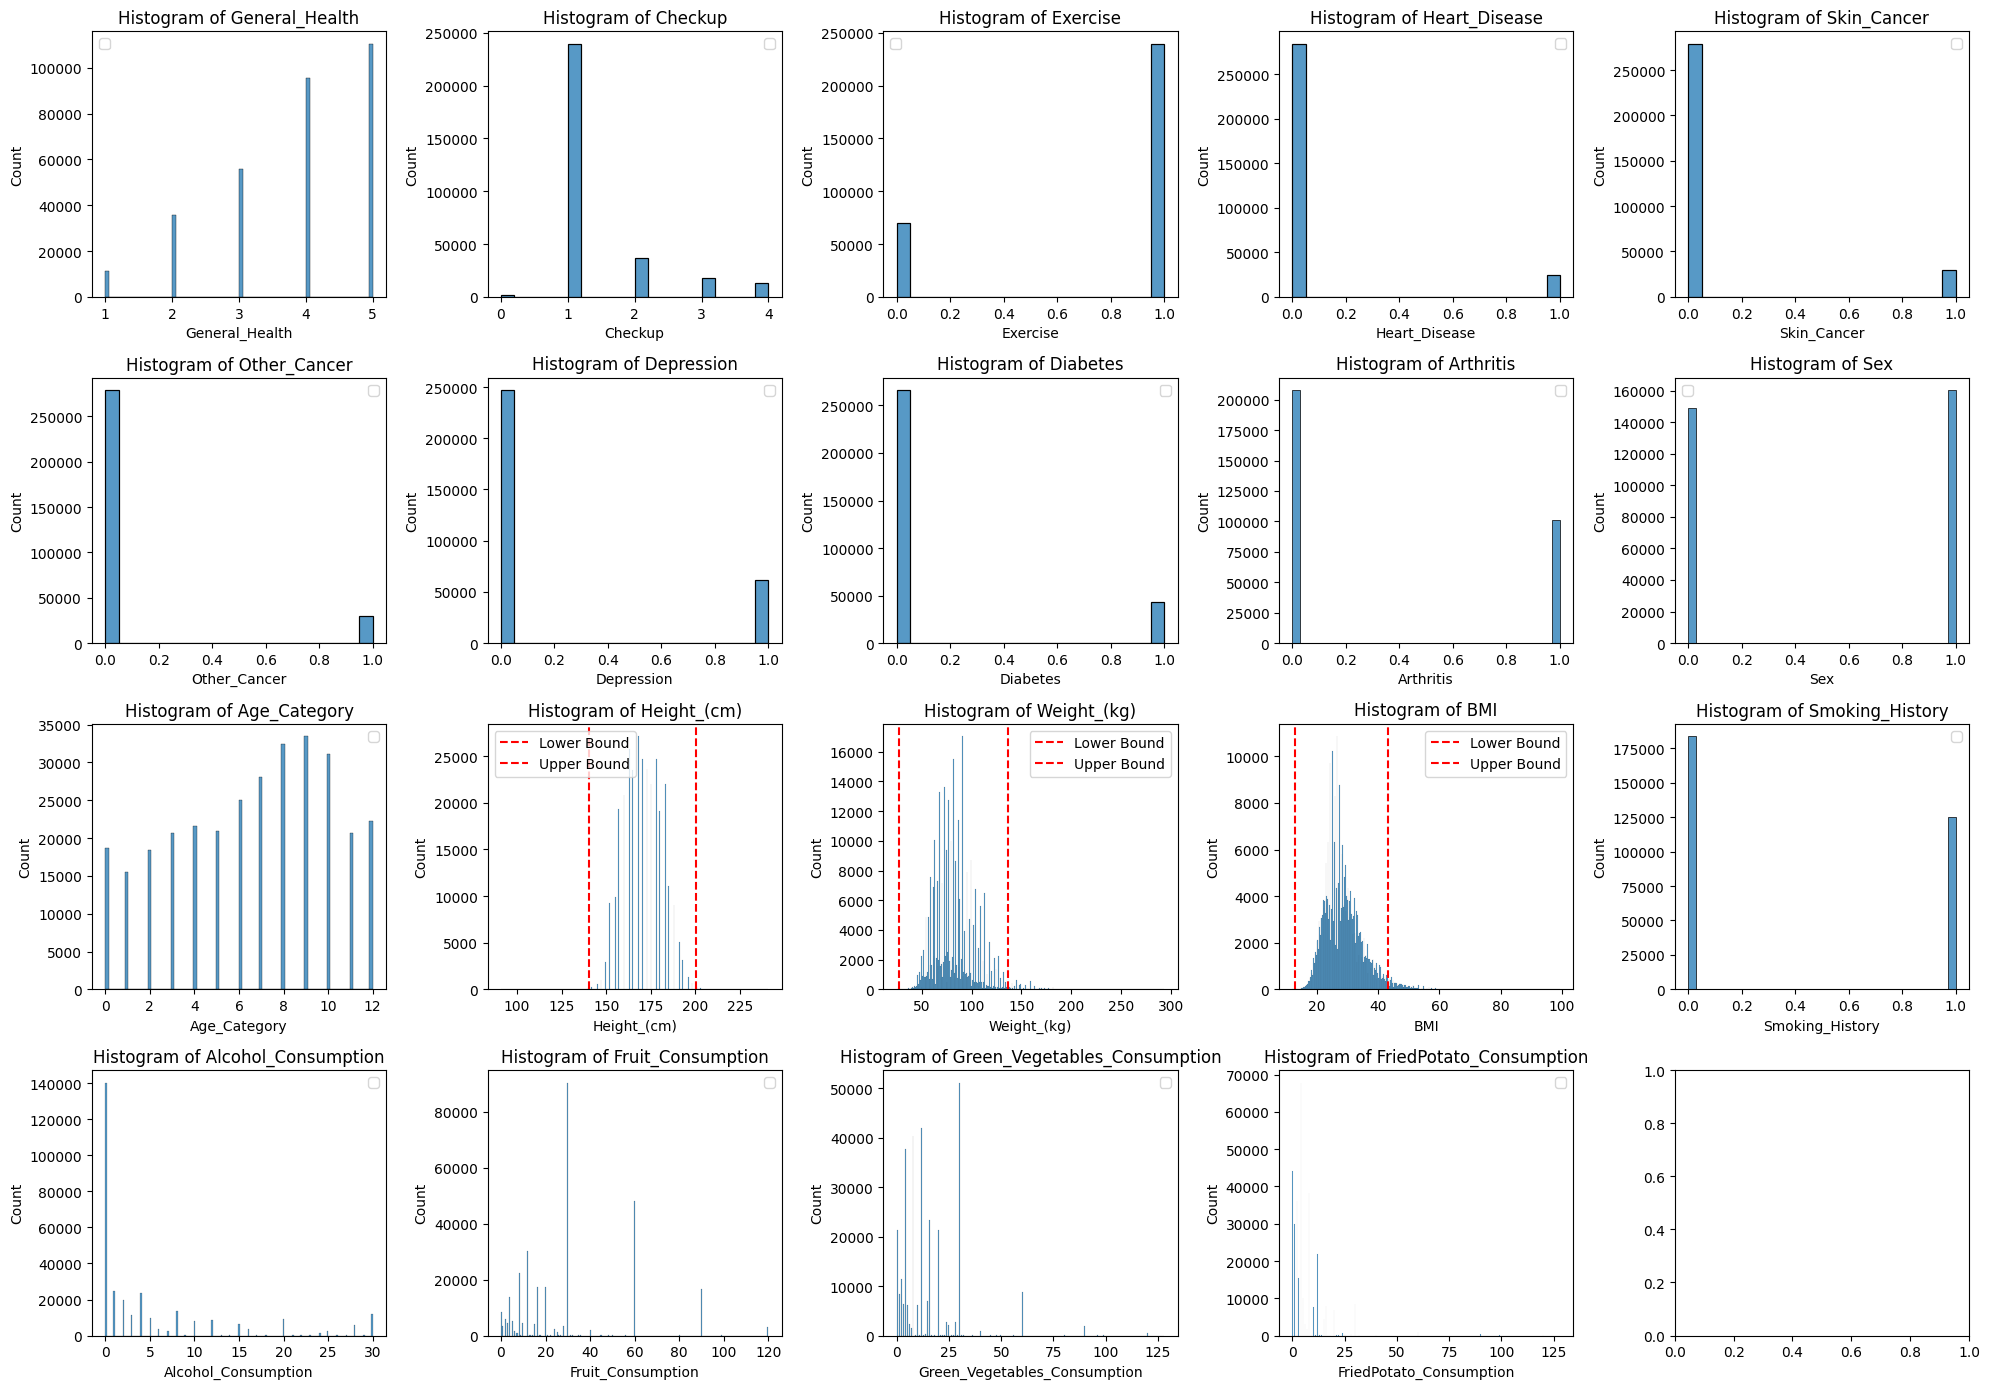

In [19]:
fig, axes = plt.subplots(4, 5, figsize=(20, 14))

for col, ax in zip(data, axes.flatten()):
    if col in ['Height_(cm)', 'Weight_(kg)', 'BMI']:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Plot red lines indicating the outlier bounds in the current subplot
        ax.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
        ax.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

    # Plot histogram in the current subplot
    sns.histplot(data=data, ax=ax, x=col)

    # Set labels and title for the current subplot
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {col}')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Có một vài giá trị ngoại lệ trong các cột Height, Weight và BMI mà chúng ta cần loại bỏ.

In [20]:
data_train = data.copy()
for col in ['Height_(cm)', 'Weight_(kg)', 'BMI']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_train = data_train[(data_train[col] >= lower_bound) & (data_train[col] <= upper_bound)]

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295930 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                295930 non-null  int64  
 1   Checkup                       295930 non-null  int64  
 2   Exercise                      295930 non-null  int64  
 3   Heart_Disease                 295930 non-null  int64  
 4   Skin_Cancer                   295930 non-null  int64  
 5   Other_Cancer                  295930 non-null  int64  
 6   Depression                    295930 non-null  int64  
 7   Diabetes                      295930 non-null  int64  
 8   Arthritis                     295930 non-null  int64  
 9   Sex                           295930 non-null  int64  
 10  Age_Category                  295930 non-null  int64  
 11  Height_(cm)                   295930 non-null  float64
 12  Weight_(kg)                   295930 non-null  fl

# 4. Modeling

## 4.1. Chia tập dữ liệu

In [21]:
X = data_train.drop(['Heart_Disease'], axis=1)
y = data_train['Heart_Disease']

In [22]:
X.shape

(295930, 18)

In [23]:
y.shape

(295930,)

In [24]:
# split the dataset to the train and test set, prepare for training model
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.25, random_state = 42)

In [25]:
# define the dictionary to store all results
results = {}
results_train = {}
results_val = {}

In [26]:
X_train_val


,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
159875,4,4,0,0,0,0,0,0,1,6,170.0,102.06,35.24,1,0.0,4.0,8.0,8.0
61483,4,4,1,0,0,0,0,1,1,5,175.0,79.38,25.84,1,4.0,20.0,30.0,8.0
142266,5,1,1,0,0,0,0,0,1,6,163.0,73.94,27.98,1,4.0,6.0,20.0,6.0
45383,3,1,1,1,0,0,0,0,1,1,163.0,68.04,25.75,0,0.0,24.0,16.0,8.0
76071,5,1,0,0,0,0,0,1,1,9,157.0,95.25,38.41,1,30.0,30.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222212,3,3,1,0,0,0,0,0,0,6,188.0,88.45,25.04,0,1.0,60.0,12.0,1.0
68243,3,1,1,0,0,0,0,0,0,7,163.0,90.72,34.33,1,0.0,30.0,30.0,8.0
265007,5,1,1,0,0,1,0,1,1,8,163.0,58.06,21.97,0,28.0,0.0,0.0,0.0
219914,3,2,1,0,0,0,0,0,0,1,178.0,74.84,23.67,0,8.0,30.0,0.0,5.0


In [28]:
X_test

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
7595,5,1,0,1,1,0,0,1,1,12,163.0,80.29,30.38,0,3.0,4.0,12.0,0.0
85278,5,1,1,0,0,0,0,0,1,11,173.0,90.72,30.41,1,1.0,30.0,16.0,4.0
300092,2,1,0,0,0,1,1,0,0,5,175.0,111.13,36.18,1,0.0,0.0,0.0,25.0
158980,5,1,1,0,0,0,0,0,0,0,183.0,95.25,28.48,0,7.0,30.0,1.0,2.0
237397,3,1,1,0,0,0,0,0,0,5,183.0,74.84,22.38,0,5.0,90.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247623,5,1,1,0,0,1,0,0,1,10,165.0,81.65,29.95,1,0.0,12.0,12.0,4.0
80568,2,1,1,0,0,1,1,0,1,5,168.0,104.33,37.12,0,20.0,5.0,5.0,5.0
75529,2,1,1,1,0,0,0,1,0,12,185.0,72.57,21.11,0,0.0,30.0,30.0,12.0
300094,5,1,1,0,0,0,0,0,0,2,170.0,79.38,27.41,0,3.0,30.0,16.0,12.0


In [29]:
y_train_val

159875    0
61483     0
142266    0
45383     0
76071     0
         ..
222212    0
68243     0
265007    0
219914    0
58193     0
Name: Heart_Disease, Length: 236744, dtype: int64

In [30]:
y_test

7595      0
85278     0
300092    0
158980    0
237397    0
         ..
247623    1
80568     0
75529     0
300094    0
89907     0
Name: Heart_Disease, Length: 59186, dtype: int64

In [31]:
X_train

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
56093,4,4,1,0,0,0,0,0,0,1,191.0,104.33,28.75,1,0.0,30.0,4.0,4.0
198675,3,4,1,0,0,0,0,0,0,5,178.0,81.65,25.83,1,0.0,60.0,4.0,0.0
210090,4,1,1,0,0,1,0,1,1,7,160.0,57.61,22.50,1,0.0,16.0,0.0,1.0
98150,4,1,1,0,0,1,0,1,0,11,180.0,82.55,25.38,1,4.0,90.0,1.0,0.0
264139,3,1,1,0,0,0,0,0,0,7,183.0,127.01,37.97,0,0.0,15.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30373,2,3,0,0,0,0,0,0,1,6,168.0,77.11,27.44,0,0.0,60.0,12.0,8.0
238293,5,2,0,0,0,0,0,0,0,6,175.0,63.50,20.67,0,0.0,60.0,8.0,4.0
61264,5,1,1,0,0,0,1,0,0,8,178.0,83.91,26.54,1,0.0,30.0,0.0,0.0
169121,5,1,1,0,0,0,0,1,1,7,163.0,113.40,42.91,0,4.0,30.0,20.0,2.0


In [32]:
y_train

56093     0
198675    0
210090    1
98150     1
264139    0
         ..
30373     0
238293    0
61264     0
169121    0
272295    0
Name: Heart_Disease, Length: 177558, dtype: int64

In [33]:
X_test

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
7595,5,1,0,1,1,0,0,1,1,12,163.0,80.29,30.38,0,3.0,4.0,12.0,0.0
85278,5,1,1,0,0,0,0,0,1,11,173.0,90.72,30.41,1,1.0,30.0,16.0,4.0
300092,2,1,0,0,0,1,1,0,0,5,175.0,111.13,36.18,1,0.0,0.0,0.0,25.0
158980,5,1,1,0,0,0,0,0,0,0,183.0,95.25,28.48,0,7.0,30.0,1.0,2.0
237397,3,1,1,0,0,0,0,0,0,5,183.0,74.84,22.38,0,5.0,90.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247623,5,1,1,0,0,1,0,0,1,10,165.0,81.65,29.95,1,0.0,12.0,12.0,4.0
80568,2,1,1,0,0,1,1,0,1,5,168.0,104.33,37.12,0,20.0,5.0,5.0,5.0
75529,2,1,1,1,0,0,0,1,0,12,185.0,72.57,21.11,0,0.0,30.0,30.0,12.0
300094,5,1,1,0,0,0,0,0,0,2,170.0,79.38,27.41,0,3.0,30.0,16.0,12.0


## 4.2. Logistic

In [27]:
%%time

train_f1 = []
val_f1 = []
test_f1 = []

# List of hyper-parameter values
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e4]

for C in Cs:
    logistic_model = LogisticRegression(class_weight='balanced', penalty = 'l2', solver = 'liblinear', max_iter = 10000, C = C, random_state = 42) # call model from lib
    logistic_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

    y_train_pred = logistic_model.predict(X_train)
    y_val_pred = logistic_model.predict(X_val)
    y_test_pred = logistic_model.predict(X_test)

    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    train_f1.append(f1_train)
    val_f1.append(f1_val)
    test_f1.append(f1_test)

    print('C: {:7} | train f1: {:5} | val f1: {:5} | test f1: {:5}'.
          format(C, round(f1_train, 2), round(f1_val, 2), round(f1_test, 2)))



best_C = Cs[np.argmax(val_f1)]

print(f'The best C (hyper-parameter) value, C = {best_C}')

training_start_time = time.time()

logistic_model = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter = 100000, C = best_C, random_state = 42)
logistic_model.fit(X_train, y_train)

y_train_pred = logistic_model.predict(X_train)
y_val_pred = logistic_model.predict(X_val)
y_test_pred = logistic_model.predict(X_test)

training_end_time = time.time()
training_time_total = training_end_time - training_start_time
print(training_time_total)

results['Logistic Regression model'] = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='weighted'),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_test, y_test_pred, average='weighted'),
    training_time_total
]

results_train['Logistic Regression model'] = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='weighted'),
    recall_score(y_train, y_train_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted'),
    training_time_total
]

results_val['Logistic Regression model'] = [
    accuracy_score(y_val, y_val_pred),
    precision_score(y_val, y_val_pred, average='weighted'),
    recall_score(y_val, y_val_pred, average='weighted'),
    f1_score(y_val, y_val_pred, average='weighted'),
    training_time_total
]

C:  0.0001 | train f1:  0.77 | val f1:  0.77 | test f1:  0.77
C:   0.001 | train f1:  0.78 | val f1:  0.78 | test f1:  0.79
C:    0.01 | train f1:  0.79 | val f1:  0.79 | test f1:  0.79
C:     0.1 | train f1:  0.79 | val f1:  0.79 | test f1:  0.79


KeyboardInterrupt: 

In [ ]:
accuracy_percentage = accuracy_score(y_test, y_test_pred) * 100
precision_percentage = precision_score(y_test, y_test_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_test_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_test_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x7dff7714a560>
accuracy:  92.0065556043659
precision:  88.79431569252259
recall:  92.0065556043659
f1_score:  88.98794572222258
training time total:  2.439235210418701


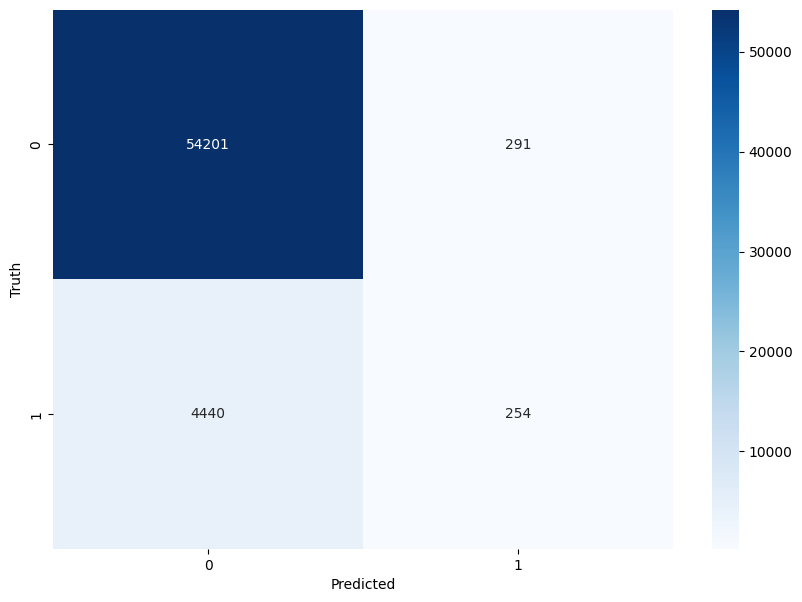

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

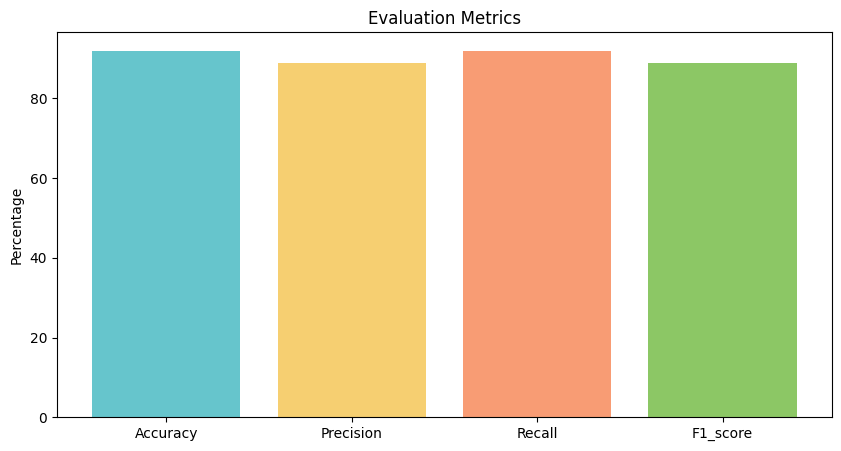

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision = precision_score(y_test, y_test_pred, average='weighted') * 100
recall = recall_score(y_test, y_test_pred, average='weighted') * 100
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

## 4.3. K-NN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# %%time
training_start_time = time.time()

knn_model = KNeighborsClassifier() # call model from lib
knn_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
# y_val_pred = knn_model.predict(X_val)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['k Nearest Neighbors (k-NN)'] = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='weighted'),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_test, y_test_pred, average='weighted'),
    training_time_total
]


results_train['k Nearest Neighbors (k-NN)'] = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='weighted'),
    recall_score(y_train, y_train_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted'),
    training_time_total
]

In [ ]:
accuracy_percentage = accuracy_score(y_test, y_test_pred) * 100
precision_percentage = precision_score(y_test, y_test_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_test_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_test_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x7dff7714a560>
accuracy:  91.59942148872038
precision:  87.00681632110087
recall:  91.59942148872038
f1_score:  88.61814798131546
training time total:  421.8980574607849


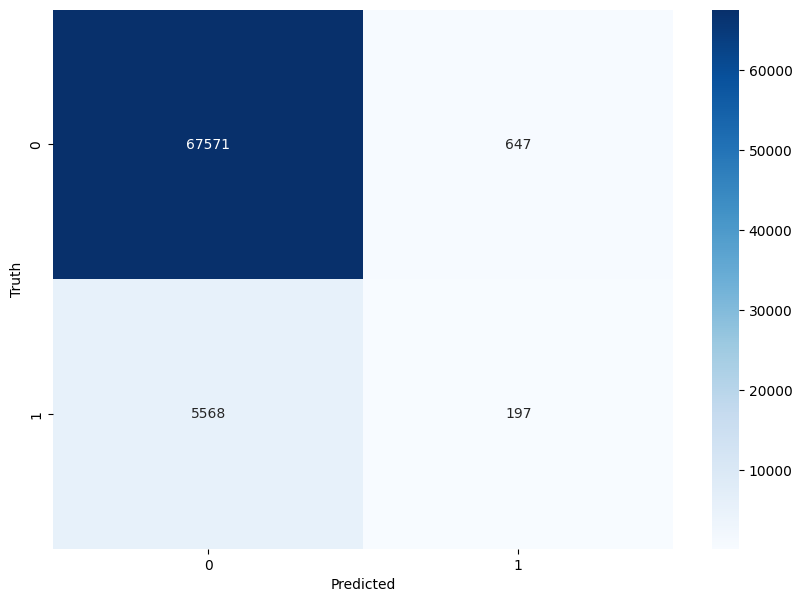

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

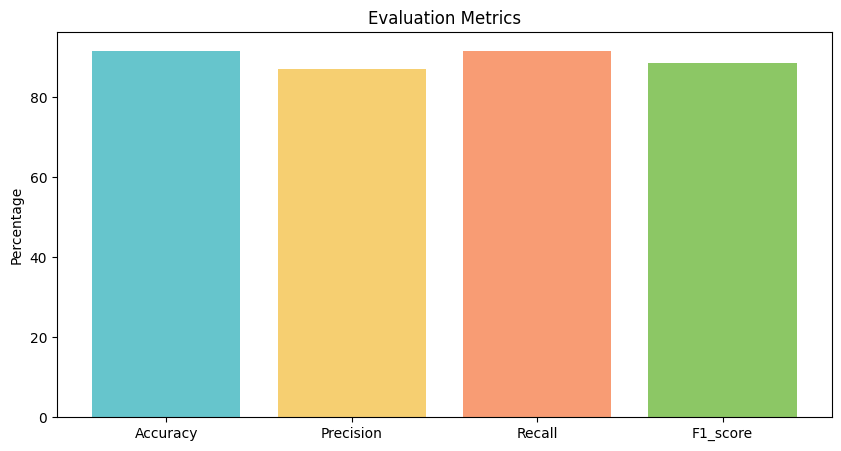

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision = precision_score(y_test, y_test_pred, average='weighted') * 100
recall = recall_score(y_test, y_test_pred, average='weighted') * 100
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

## 4.4. Decision tree

In [ ]:
# split the dataset to the train and test set, prepare for training model
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.25, random_state = 42)

In [ ]:
import sklearn.metrics as metrics
train_f1 = []
val_f1 = []
test_f1 = []

depths = [1, 2, 3, 5, 10, 15]



for depth in depths:

    dtree = DecisionTreeClassifier(max_depth = depth, random_state = 42)

    dtree.fit(X_train, y_train)

    y_train_pred = dtree.predict(X_train)
    y_val_pred = dtree.predict(X_val)
    y_test_pred = dtree.predict(X_test)

    f1_train = f1_score(y_train, y_train_pred)
    f1_val = f1_score(y_val, y_val_pred)
    f1_test = f1_score(y_test, y_test_pred)

    train_f1.append(f1_train)
    val_f1.append(f1_val)
    test_f1.append(f1_test)

    print('max_depth: {:3} | train f1: {:5} | val f1: {:5} | test f1: {:5}'.
          format(depth, round(f1_train, 2), round(f1_val, 2), round(f1_test, 2)))

best_max_depth = depths[np.argmax(val_f1)]
print(f'The best max_depth (hyper-parameter) value, max_depth = {best_max_depth}')



# %%time
training_start_time = time.time()


decision_tree_model = DecisionTreeClassifier(max_depth=best_max_depth) # call model from lib
decision_tree_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Desision Tree'] = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='weighted'),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_test, y_test_pred, average='weighted'),
    training_time_total
]


results_train['Desision Tree'] = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='weighted'),
    recall_score(y_train, y_train_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted'),
    training_time_total
]

results_val['Desision Tree'] = [
    accuracy_score(y_val, y_val_pred),
    precision_score(y_val, y_val_pred, average='weighted'),
    recall_score(y_val, y_val_pred, average='weighted'),
    f1_score(y_val, y_val_pred, average='weighted'),
    training_time_total
]

max_depth:   1 | train f1:   0.0 | val f1:   0.0 | test f1:   0.0
max_depth:   2 | train f1:   0.0 | val f1:   0.0 | test f1:   0.0
max_depth:   3 | train f1:   0.0 | val f1:   0.0 | test f1:   0.0
max_depth:   5 | train f1:  0.07 | val f1:  0.06 | test f1:  0.07
max_depth:  10 | train f1:  0.17 | val f1:   0.1 | test f1:  0.09
max_depth:  15 | train f1:  0.52 | val f1:  0.16 | test f1:  0.16
The best max_depth (hyper-parameter) value, max_depth = 15


In [ ]:
accuracy_percentage = accuracy_score(y_test, y_test_pred) * 100
precision_percentage = precision_score(y_test, y_test_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_test_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_test_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x7dff7714a560>
accuracy:  90.16659345115399
precision:  87.33036069997475
recall:  90.16659345115399
f1_score:  88.52193979967517
training time total:  1.3424162864685059


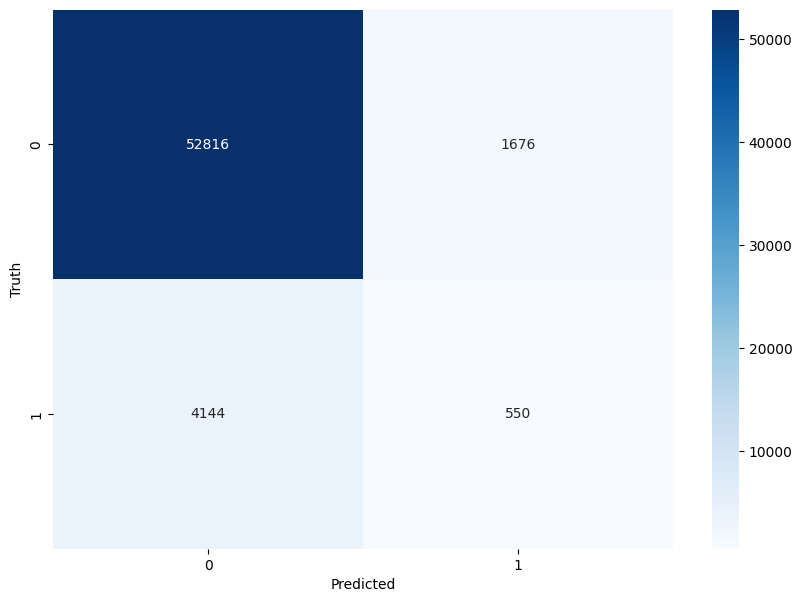

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

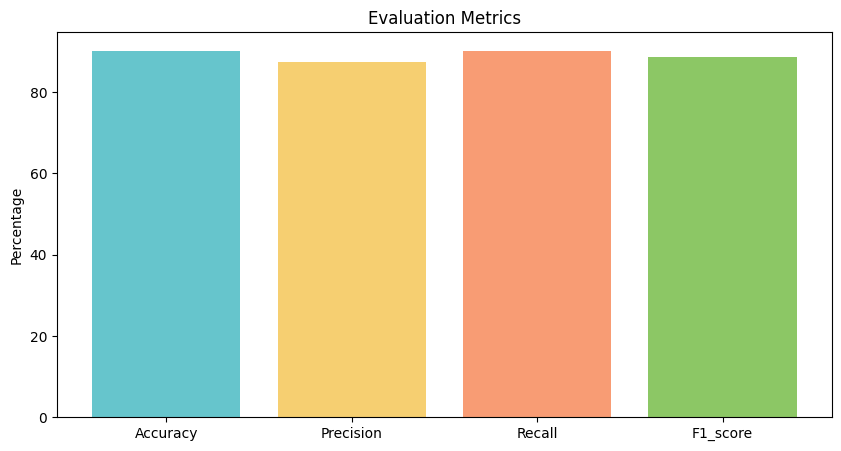

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision = precision_score(y_test, y_test_pred, average='weighted') * 100
recall = recall_score(y_test, y_test_pred, average='weighted') * 100
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

## 4.5. Random Forest

In [ ]:
# %%time

train_f1 = []
val_f1 = []
test_f1 = []

depths = [1, 2, 3, 5, 10, 15, 20, 25]

for depth in depths:

    random_forest_model = RandomForestClassifier(max_depth = depth) # call model from lib

    random_forest_model.fit(X_train, y_train)

    y_train_pred = random_forest_model.predict(X_train)
    y_val_pred = random_forest_model.predict(X_val)
    y_test_pred = random_forest_model.predict(X_test)

    f1_train = f1_score(y_train, y_train_pred)
    f1_val = f1_score(y_val, y_val_pred)
    f1_test = f1_score(y_test, y_test_pred)

    train_f1.append(f1_train)
    val_f1.append(f1_val)
    test_f1.append(f1_test)

    print('max_depth: {:3} | train f1: {:5} | val f1: {:5} | test f1: {:5}'.
          format(depth, round(f1_train, 2), round(f1_val, 2), round(f1_test, 2)))

best_max_depth = depths[np.argmax(val_f1)]
print(f'The best max_depth (hyper-parameter) value, max_depth = {best_max_depth}')

training_start_time = time.time()

random_forest_model = RandomForestClassifier(max_depth = best_max_depth) # call model from lib

random_forest_model.fit(X_train, y_train)

y_train_pred = random_forest_model.predict(X_train)
y_val_pred = random_forest_model.predict(X_val)
y_test_pred = random_forest_model.predict(X_test)


training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Random forest'] = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='weighted'),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_test, y_test_pred, average='weighted'),
    training_time_total
]


results_train['Random forest'] = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='weighted'),
    recall_score(y_train, y_train_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted'),
    training_time_total
]

results_val['Random forest'] = [
    accuracy_score(y_val, y_val_pred),
    precision_score(y_val, y_val_pred, average='weighted'),
    recall_score(y_val, y_val_pred, average='weighted'),
    f1_score(y_val, y_val_pred, average='weighted'),
    training_time_total
]

max_depth:   1 | train f1:   0.0 | val f1:   0.0 | test f1:   0.0
max_depth:   2 | train f1:   0.0 | val f1:   0.0 | test f1:   0.0
max_depth:   3 | train f1:   0.0 | val f1:   0.0 | test f1:   0.0
max_depth:   5 | train f1:   0.0 | val f1:   0.0 | test f1:   0.0
max_depth:  10 | train f1:  0.05 | val f1:  0.02 | test f1:  0.02
max_depth:  15 | train f1:  0.41 | val f1:  0.05 | test f1:  0.05
max_depth:  20 | train f1:  0.84 | val f1:  0.07 | test f1:  0.08
max_depth:  25 | train f1:  0.99 | val f1:  0.08 | test f1:  0.08
The best max_depth (hyper-parameter) value, max_depth = 25


In [ ]:
accuracy_percentage = accuracy_score(y_test, y_test_pred) * 100
precision_percentage = precision_score(y_test, y_test_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_test_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_test_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x7dff7714a560>
accuracy:  91.97614300679214
precision:  88.49280944412895
recall:  91.97614300679214
f1_score:  88.80956732676263
training time total:  40.19137740135193


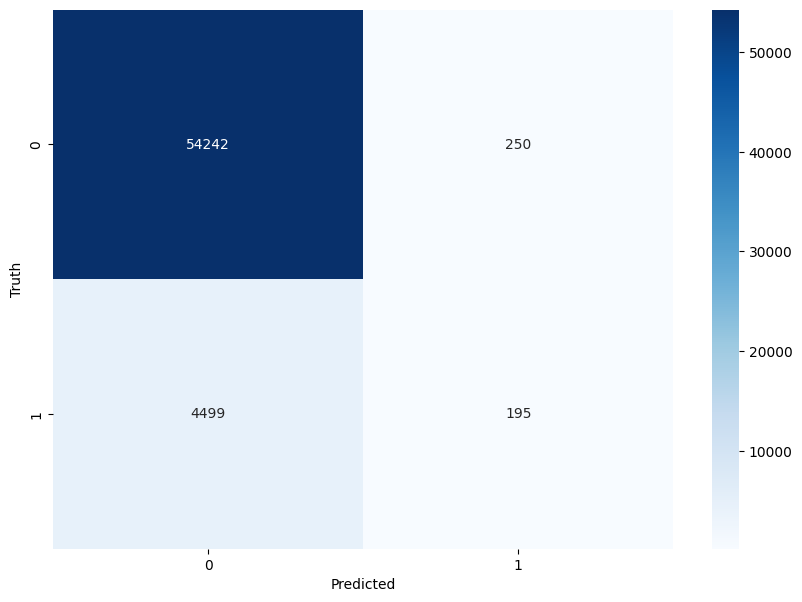

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

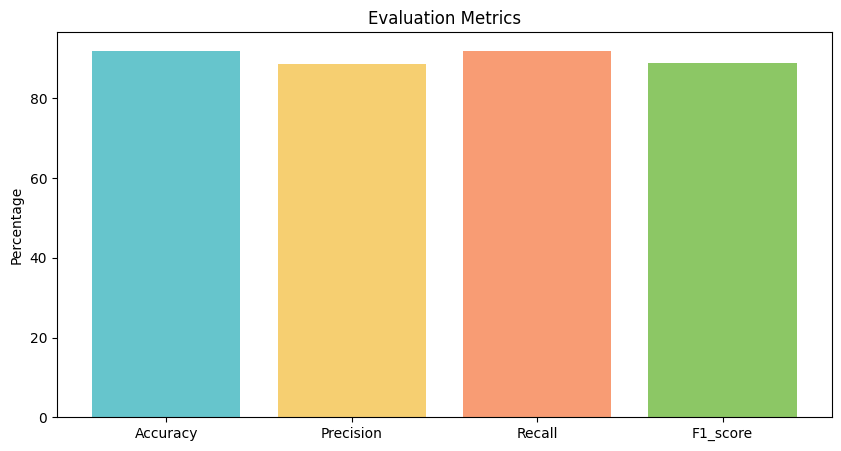

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision = precision_score(y_test, y_test_pred, average='weighted') * 100
recall = recall_score(y_test, y_test_pred, average='weighted') * 100
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

## 4.6. So sánh các kết quả phân loại

In [ ]:
dataframe_results = pd.DataFrame.from_dict(results, orient='index', columns=[
    'Accuracy',
    'Precision',
    'Recall',
    'F1_score',
    'Training time total'
])

dataframe_results

,Accuracy,Precision,Recall,F1_score,Training time total
Logistic Regression model,0.920066,0.887943,0.920066,0.889879,2.439235
k Nearest Neighbors (k-NN),0.915994,0.870068,0.915994,0.886181,421.898057
Desision Tree,0.901666,0.873304,0.901666,0.885219,1.342416
Random forest,0.919761,0.884928,0.919761,0.888096,40.191377


In [ ]:
dataframe_results_train = pd.DataFrame.from_dict(results_train, orient='index', columns=[
    'Accuracy',
    'Precision',
    'Recall',
    'F1_score',
    'Training time total'
])

dataframe_results_train

,Accuracy,Precision,Recall,F1_score,Training time total
Logistic Regression model,0.919840,0.890051,0.919840,0.889279,2.439235
k Nearest Neighbors (k-NN),0.924586,0.909962,0.924586,0.898774,421.898057
Desision Tree,0.944807,0.940994,0.944807,0.934436,1.342416
Random forest,0.997837,0.997842,0.997837,0.997824,40.191377


In [ ]:
dataframe_results_val = pd.DataFrame.from_dict(results_val, orient='index', columns=[
    'Accuracy',
    'Precision',
    'Recall',
    'F1_score',
    'Training time total'
])

dataframe_results_val

,Accuracy,Precision,Recall,F1_score,Training time total
Logistic Regression model,0.918950,0.888527,0.918950,0.888247,2.439235
Desision Tree,0.899926,0.870795,0.899926,0.882962,1.342416
Random forest,0.917599,0.880243,0.917599,0.885175,40.191377


## 4.7. ANNs

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'X' is not defined

In [ ]:
# Xây dựng mô hình ANN
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/20
5919/5919 [==============================] - 25s 4ms/step - loss: 0.2439 - accuracy: 0.9184 - val_loss: 0.2292 - val_accuracy: 0.9205
Epoch 2/20
5919/5919 [==============================] - 24s 4ms/step - loss: 0.2340 - accuracy: 0.9188 - val_loss: 0.2280 - val_accuracy: 0.9205
Epoch 3/20
5919/5919 [==============================] - 24s 4ms/step - loss: 0.2321 - accuracy: 0.9189 - val_loss: 0.2255 - val_accuracy: 0.9205
Epoch 4/20
5919/5919 [==============================] - 22s 4ms/step - loss: 0.2310 - accuracy: 0.9187 - val_loss: 0.2259 - val_accuracy: 0.9205
Epoch 5/20
5919/5919 [==============================] - 23s 4ms/step - loss: 0.2305 - accuracy: 0.9188 - val_loss: 0.2248 - val_accuracy: 0.9205
Epoch 6/20
5919/5919 [==============================] - 22s 4ms/step - loss: 0.2297 - accuracy: 0.9189 - val_loss: 0.2229 - val_accuracy: 0.9205
Epoch 7/20
5919/5919 [==============================] - 23s 4ms/step - loss: 0.2291 - accuracy: 0.9188 - val_loss: 0.2244 - val_ac

In [1]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Dự đoán trên tập kiểm tra
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Tính toán các thước đo hiệu suất
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

NameError: name 'model' is not defined

## 4.8. K-means

Chọn ra các thuộc tính để phân loại bao gồm: General_Health, Heart_Disease, Age_Category, Height_(cm), Weight_(kg), BMI

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

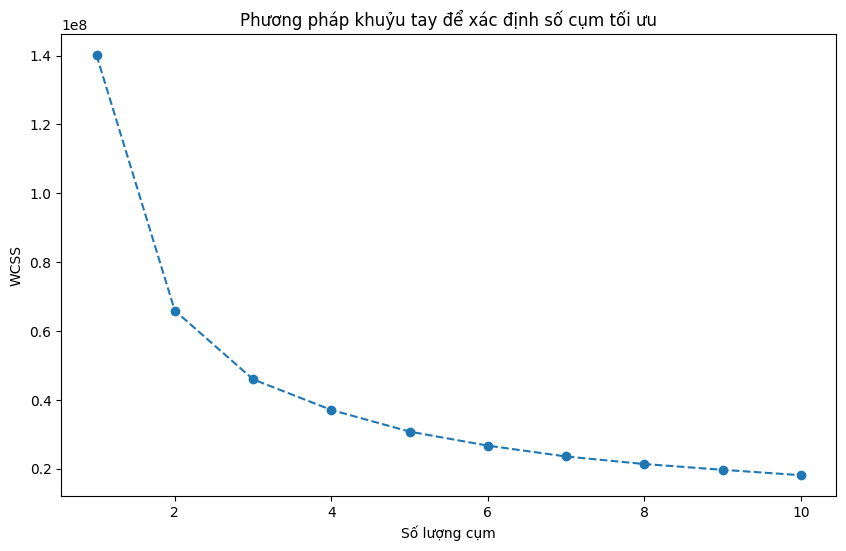

In [ ]:
features = ['General_Health', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI']
X = data_train[features]

wcss = []  # Tổng bình phương khoảng cách trong cụm
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ khuỷu tay để xác định số cụm tối ưu
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Phương pháp khuỷu tay để xác định số cụm tối ưu')
plt.xlabel('Số lượng cụm')
plt.ylabel('WCSS')
plt.show()

Chọn k = 3 để phân cụm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        General_Health  Age_Category  Height_(cm)  Weight_(kg)    BMI  Cluster
0                    1            10        150.0        32.66  14.54        2
1                    5            10        165.0        77.11  28.29        1
2                    5             8        163.0        88.45  33.47        1
3                    1            11        180.0        93.44  28.73        1
4                    4            12        191.0        88.45  24.37        1
...                ...           ...          ...          ...    ...      ...
308849               5             1        168.0        81.65  29.05        1
308850               2             9        180.0        69.85  21.48        1
308851               5             2        157.0        61.23  24.69        2
308852               5             9        183.0        79.38  23.73        1
308853               3             5        160.0        81.19  31.71        1

[295930 rows x 6 columns]


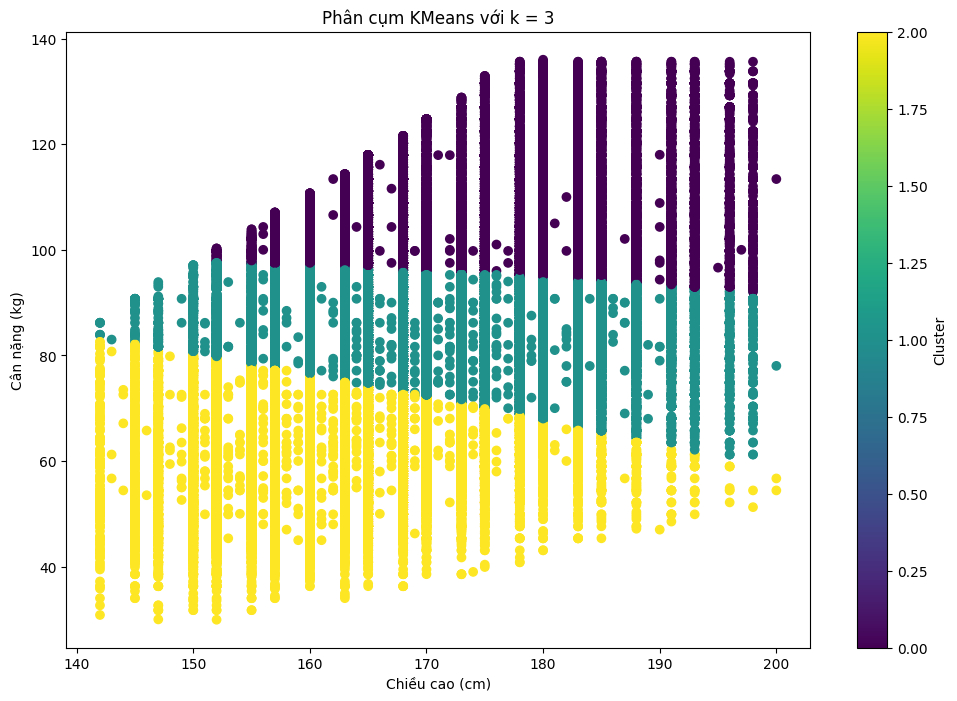

In [ ]:
# Áp dụng thuật toán KMeans với k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
data_train['Cluster'] = kmeans.fit_predict(X)

# In ra kết quả phân cụm
print(data_train[['General_Health', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Cluster']])

# Trực quan hóa kết quả với 'Height_(cm)' và 'Weight_(kg)'
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_train['Height_(cm)'], data_train['Weight_(kg)'], c=data_train['Cluster'], cmap='viridis', marker='o')
plt.title('Phân cụm KMeans với k = 3')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.colorbar(scatter, label='Cluster')
plt.show()

Nhận xét: Cụm có cân nặng cao hơn có nguy cơ mắc bệnh tim mạch nhiều hơn. Từ đây, bằng cách duy trì cân nặng hợp lý và sống lành mạnh, có thể giảm đáng kể nguy cơ mắc các bệnh tim mạch và cải thiện chất lượng cuộc sống.
